# Notebook for data analysis

We will use Pandas library to get insights for data collected during simulations.

Created using python 3.10.12

Read .csv file into pd.Dataframe object


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## SELECT MODE ##

mode_ = "pipelined" # mode = {parallelized, pipelined}
N = 10 # N = {1,5,10}
p = 0.99 # p = {0.9, 0.99}


data_dir = "~/Documents/simulation-scenarios/"
file_name = mode_ + "-N" + str(N) + "-p" + str(int(p * 100)) +".csv"
df = pd.read_csv(data_dir + file_name)

print(data_dir+file_name)

~/Documents/simulation-scenarios/pipelined-N10-p99.csv


In [55]:


def varname(var, scope=globals()):
    return [name for name, val in scope.items() if val is var][0]

def descriptive_array(array) :
    if len(array) > 0:
        obs = len(array)
        min = np.min(array)
        max = np.max(array)
        perc_5 = np.quantile(array, 0.05)
        perc_95 = np.quantile(array, 0.95)
        median = np.quantile(array, 0.5)
        mean = np.mean(array)
        variance = np.var(array)
        sd = np.std(array)
        print(
            str(mode_) + " | N=" + str(N) + " | p=" +  str(p) + "\n\n"
            "Descriptive Statistics for "+  varname(array) + ":     \n" +
            "No. of Observations:          " + str(len(array)) + "\n" +
            "Min - Max values:            [" + str(np.min(array)) + ", " + str(np.max(array)) + "]\n" +
            "[0.05, 0.5, 0.95] quantiles: [" + str(np.quantile(array, 0.05)) + ", " + str(np.quantile(array, 0.5)) +  ", " + str(np.quantile(array, 0.95)) +"]\n" + 
            "Mean:                         " + str(np.mean(array)) + "\n" + 
            "Variance (Standard Dev.):     " + str(np.var(array)) + " (" + str(np.std(array)) + ")\n")
    else: 
        print("No observations...")

    return obs, min, max, perc_5, perc_95, median, mean, variance, sd



# Production times of non-defective items

Normality checking

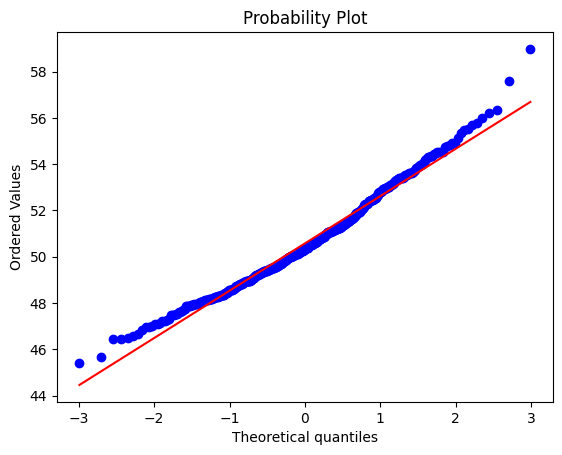

W = 0.9825686416762978
p-value = 1.0598291187861449e-05


In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro

times = df["value"]

stats.probplot(times, dist="norm", plot=plt)
plt.show()


stat, p = shapiro(times)
print("W =", stat)
print("p-value =", p)

pipelined | N=10 | p=1.0598291187861449e-05

Descriptive Statistics for times:     
No. of Observations:          500
Min - Max values:            [45.40516068011, 58.975744501949]
[0.05, 0.5, 0.95] quantiles: [47.65107158532195, 50.3451849742375, 54.2937113764948]
Mean:                         50.573752727334174
Variance (Standard Dev.):     4.205944068503368 (2.0508398446742175)



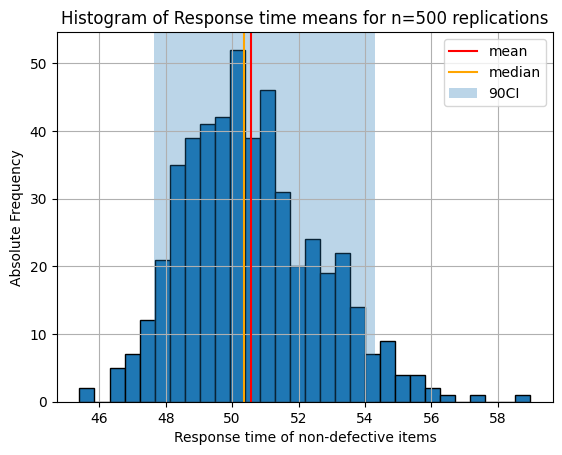

In [65]:
obs, min, max, perc_5, perc_95, median, mean, variance, sd = descriptive_array(times)
plt.grid()
plt.hist(times, bins = 30, edgecolor = "black")
plt.axvline(x=mean, color = "red", label="mean")
plt.axvline(x=median, color = "orange", label = "median")
plt.axvspan(perc_5, perc_95, alpha=0.3, label = "90CI")
plt.title("Histogram of Response time means for n=500 replications")
plt.xlabel("Response time of non-defective items")
plt.ylabel("Absolute Frequency")
plt.legend()

plt.show()